In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wattsquad.ml_logic import preproc
from wattsquad.ml_logic import calculations

       battery_percentage  electricity_bought_kwH  electricity_bought_NOK
count         9515.000000             9515.000000             9515.000000
mean             0.582019                4.554901                1.068755
std              0.403389               11.633544                3.601124
min              0.000000                0.000000                0.000000
25%              0.073916                0.000000                0.000000
50%              0.727313                0.000000                0.000000
75%              0.987349                0.000000                0.000000
max              1.000000              604.540688              155.947316


In [2]:
train = pd.read_csv("../../raw_data/train.csv")

In [3]:
X_train_transformed = preproc.transform_data(train)

➡️ preprocessing done


In [4]:
test = pd.read_csv("../../raw_data/test.csv")

In [5]:
X_test_transformed = preproc.transform_data(test)

➡️ preprocessing done


## Describing consumption for 2022

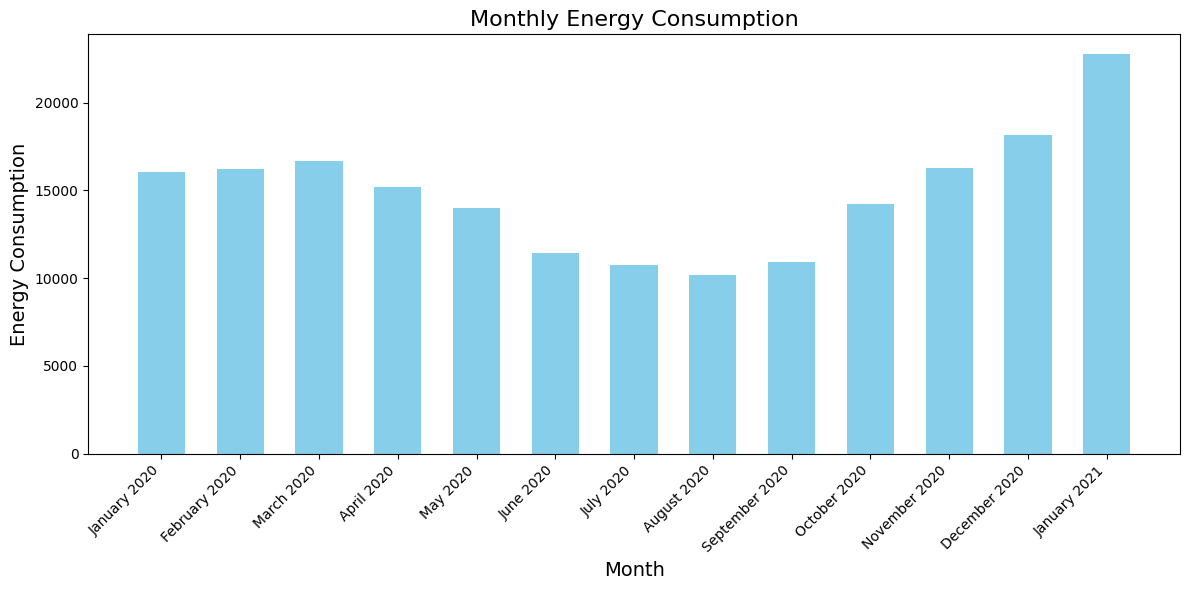

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'train' is your dataframe
# Ensure the 'time' column is in datetime format
train['time'] = pd.to_datetime(train['time'])

# Extract month and year for grouping
train['month_year'] = train['time'].dt.to_period('M')

# Aggregate consumption by month
monthly_consumption = train.groupby('month_year')['consumption'].sum().reset_index()

# Convert month_year to a datetime format for proper plotting
monthly_consumption['month_year'] = monthly_consumption['month_year'].dt.to_timestamp()

# Format the month-year column as 'January 2020', etc.
monthly_consumption['month_year_str'] = monthly_consumption['month_year'].dt.strftime('%B %Y')

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(monthly_consumption['month_year_str'], monthly_consumption['consumption'], color='skyblue', width=0.6)

# Formatting the plot
plt.title('Monthly Energy Consumption', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Energy Consumption', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   time                      9515 non-null   datetime64[ns]
 1   pv_production             9515 non-null   float64       
 2   wind_production           9515 non-null   float64       
 3   consumption               9515 non-null   float64       
 4   spot_market_price         9515 non-null   float64       
 5   precip_1h:mm              9515 non-null   float64       
 6   precip_type:idx           9515 non-null   float64       
 7   prob_precip_1h:p          9515 non-null   float64       
 8   clear_sky_rad:W           9515 non-null   float64       
 9   clear_sky_energy_1h:J     9515 non-null   float64       
 10  diffuse_rad:W             9515 non-null   float64       
 11  diffuse_rad_1h:Wh         9515 non-null   float64       
 12  direct_rad:W        

In [9]:
train["consumption"].describe()

count    9515.000000
mean       20.262091
std         8.311275
min         0.048396
25%        14.757704
50%        18.817098
75%        23.716080
max        70.366622
Name: consumption, dtype: float64

In [25]:
calculations.load_data()

FileNotFoundError: [Errno 2] No such file or directory: 'raw_data/train.csv'